In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pickle

    # open files

with open("energies_interacting_100_states.pkl", 'rb') as file:
    energies_int_1 = pickle.load(file)
file.close()
with open("energies_non_interacting_100_states.pkl", 'rb') as file:
    energies_non_int_1 = pickle.load(file)
file.close()
with open("energies_interacting_100_199.pkl", "rb") as file:
    energies_int_2 = pickle.load(file)
file.close()
with open("energies_non_interacting_100_199.pkl", "rb") as file:
    energies_non_int_2 = pickle.load(file)

energies_int = energies_int_1 + energies_int_2
energies_non_int = energies_non_int_1 + energies_non_int_2

# OLD WAY OF DOING IT, NOW SHOULD USE collections_iDEA
class States:
    def __init__(self, energy):
        self.states = []
        self.energy = energy

    def addState(self, state):
        self.states.append(state)

    def getStates(self):
        return self.states

    def getEnergy(self):
        return self.energy

def fill_energy_array(energy_array):
    r'Fill an array with analytical energy results (in terms of pi sqaured)'
    x = np.linspace(0, 5, 500)
    dx = x[1] - x[0]
    for i in range(len(energy_array)):
        analytic_energy = ((i+1)**2) / (2*((5+2*dx)**2))
        energy_array[i] = analytic_energy
    return energy_array

def run_comparison(energies_int, energies_non_int, zoom=None, tol=1e-12):
    
    # plot graph
    
    plt.plot(np.round(energies_int, decimals=4), color="red", marker="x")
    plt.plot(np.round(energies_non_int, decimals=4), color="blue", marker="x")
    plt.xlabel("State number")
    plt.ylabel("Energy of state (per pi squared)")
    plt.grid()
    if zoom != None:
        plt.xlim(zoom[0], zoom[1])
        plt.title(f"Plot for states {zoom[0]} to {zoom[1]}")
    
    plt.title(f"Plot for states {0} to {len(energies_int)-1}")
    plt.legend(["Energies from interacting", "Energies from non_interacting"])
    print(f"Do all energies match up: {np.allclose(energies_int, energies_non_int)}")

    # energies_int = np.round(energies_int, decimals=4)
    summary = []
    j = 0

    while j < len(energies_int):
        if j > 0 and np.abs(energies_int[j] - energies_int[j-1]) <= tol:
            # print(f"States {j-1}, {j}, ", end='')
            deg_states = States(energies_int[j])
            deg_states.addState(j-1)
            deg_states.addState(j)
            i = j + 1
            while i < len(energies_int):
                if np.abs(energies_int[i] - energies_int[i-1]) <= tol:
                    # print(i, end=', ')
                    deg_states.addState(i)
                    i += 1
                else:
                    break
            summary.append(deg_states)
            # print(f"have the same energy: {energies_interacting_100[j]}")
            j = i  # Move the outer loop index to the end of current degenerate states
        else:
            j += 1

    # Print the summary of degenerate states
    multiplets = []
    multiplet_energies = []
    for deg_states in summary:
        states = deg_states.getStates()
        multiplets.append(states)
        energy = deg_states.getEnergy()
        multiplet_energies.append(energy)

        print(f"Degenerate states: {states}, Degeneracy: {len(states)}, Energy: {energy}")
    
    with open(f"multiplets_0_200_{tol}.pkl", "wb") as file:
        pickle.dump(multiplets, file)
        print("Done")
    with open(f"multiplets_energies_0_200_{tol}.pkl", "wb") as file:
        pickle.dump(multiplet_energies, file)
        print("Done")

Do all energies match up: True
Degenerate states: [1, 2], Degeneracy: 2, Energy: 0.09649405532693774
Degenerate states: [4, 5], Degeneracy: 2, Energy: 0.19298804416749754
Degenerate states: [6, 7], Degeneracy: 2, Energy: 0.2508844707300935
Degenerate states: [8, 9], Degeneracy: 2, Energy: 0.3280795116103956
Degenerate states: [11, 12], Degeneracy: 2, Energy: 0.38597593817301296
Degenerate states: [13, 14], Degeneracy: 2, Energy: 0.48246992701350877
Degenerate states: [15, 16], Degeneracy: 2, Energy: 0.5017683394438655
Degenerate states: [17, 18], Degeneracy: 2, Energy: 0.559664766006456
Degenerate states: [20, 21], Degeneracy: 2, Energy: 0.6561587548469369
Degenerate states: [22, 23], Degeneracy: 2, Energy: 0.7140543738365562
Degenerate states: [24, 25], Degeneracy: 2, Energy: 0.771950800399148
Degenerate states: [26, 27], Degeneracy: 2, Energy: 0.7912502222899305
Degenerate states: [28, 29], Degeneracy: 2, Energy: 0.8684447892397221
Degenerate states: [30, 31], Degeneracy: 2, Energy: 

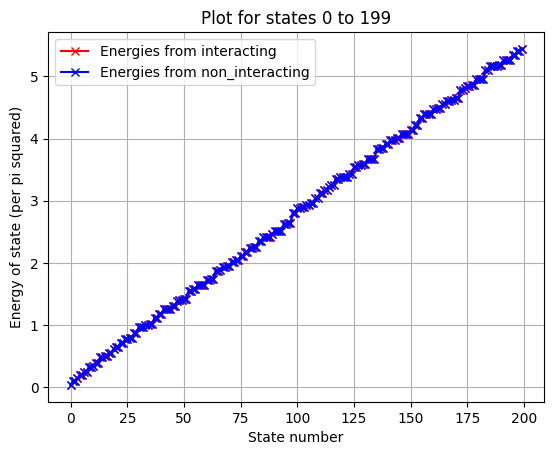

In [15]:
run_comparison(energies_int, energies_non_int, tol=1e-6)

In [5]:
# Some checking

import iDEA
import iDEA.methods
import iDEA.methods.interacting
import iDEA.methods.non_interacting
import numpy as np

points = 100
num_of_states = 10

# initialize the system
l = 5
x = np.linspace(0, l, points)
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_double = iDEA.system.System(x, v_ext, v_int, electrons="ud")

for i in range(30, 33):
    # t = iDEA.methods.non_interacting.solve(pib_double, k=i)
    # up_occ_index = t.up.occupied # index of occupied orbitals
    # down_occ_index = t.down.occupied
    # print(up_occ_index, down_occ_index)

    t = iDEA.methods.interacting.solve(pib_double, k=i)
    print(f"State {i} = {t.energy / ((np.pi)**2)}")

for i in range(98, 102):
    t = iDEA.methods.interacting.solve(pib_double, k=i)
    print(f"State {i} = {t.energy / ((np.pi)**2)}")



iDEA.methods.interacting.solve: solving eigenproblem...
State 30 = 0.9649374239216623
iDEA.methods.interacting.solve: solving eigenproblem...
State 31 = 0.9649374239216529
iDEA.methods.interacting.solve: solving eigenproblem...
State 32 = 0.9649390501234003
iDEA.methods.interacting.solve: solving eigenproblem...
State 98 = 2.7982983810269615
iDEA.methods.interacting.solve: solving eigenproblem...
State 99 = 2.7982983810270037
iDEA.methods.interacting.solve: solving eigenproblem...
State 100 = 2.7983132427966844
iDEA.methods.interacting.solve: solving eigenproblem...
State 101 = 2.7983132427967727


iDEA.methods.interacting.solve: solving eigenproblem...
State 30 = 0.9649374239216623
iDEA.methods.interacting.solve: solving eigenproblem...
State 31 = 0.9649374239216529
iDEA.methods.interacting.solve: solving eigenproblem...
State 32 = 0.9649390501234003
iDEA.methods.interacting.solve: solving eigenproblem...
State 98 = 2.7982983810269615
iDEA.methods.interacting.solve: solving eigenproblem...
State 99 = 2.7982983810270037
iDEA.methods.interacting.solve: solving eigenproblem...
State 100 = 2.7983132427966844
iDEA.methods.interacting.solve: solving eigenproblem...
State 101 = 2.7983132427967727
